Prikazaćemo rad Yeo-Johnson stepene transformacije.

**Uzorak koji koristimo**: Prosečne dnevne temperature u godini.

In [18]:
# potrebne biblioteke
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew

In [9]:
import os

# formiramo putanju do fajla
current_dir = os.getcwd()

file_name = 'data/average_daily_temperatures.csv'
file_path = os.path.join(current_dir, file_name)

try:
    data = pd.read_csv(file_path, index_col = 0)
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

#prikazujemo podatke
df = data.reset_index()
df.head()

File loaded successfully


,Day,Average_Temperature
0,1,-13.703450
1,2,-18.330678
2,3,-19.181169
3,4,-21.029242
4,5,-12.448307


In [25]:
average_data = df['Average_Temperature']

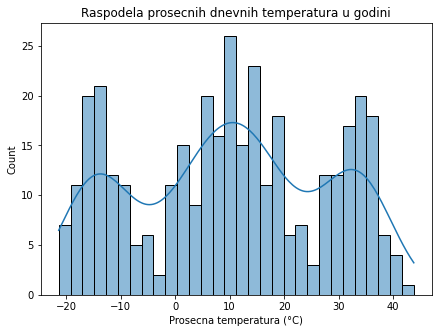

In [26]:
# Prikazujemo raspodelu originalnih podataka
plt.figure(figsize = (7, 5))

sns.histplot(average_data, kde=True, bins=30)
plt.xlabel('Prosecna temperatura (°C)')

plt.title('Raspodela prosecnih dnevnih temperatura u godini')
plt.show()

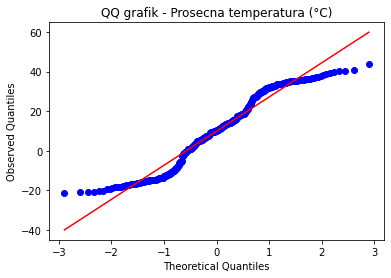

In [27]:
# Kreiranje QQ plota
stats.probplot(average_data, dist="norm", plot=plt)
plt.title('QQ grafik - Prosecna temperatura (°C)')
plt.ylabel('Observed Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

Na osnovu kreiranog QQ grafika vidimo da raspodela originalnih podataka ne prati normalnu raspodelu.

In [28]:
# isptujemo koliko nula i negativnih vrednosti imamo u skupu podataka sa kojim radimo
len(df[average_data == 0]), len(df[average_data < 0])

(0, 105)

S obzirom da u skupu imamo negativne vrednosti, za normalizaciju raspodele primenjujemo Yeo-Johnson transformaciju.

## Yeo-Johnson transformacija

Slično Box-Cox transformaciji, glavna ideja ove stepene transformacije je da modifikuje oblik raspodele podataka kako bi se približio normalnoj raspodeli, što može poboljšati performanse statističkih analiza i modela mašinskog učenja.

Bitne karakteristike:

- Primenljivost: Može se koristiti za podatke koji sadrže i pozitivne i negativne vrednosti.
- Parametar λ: Kontroliše oblik transformacije, gde različite vrednosti λ dovode do različitih modifikacija u raspodeli podataka.

Optimalna vrednost lambda: 0.9915290309772788


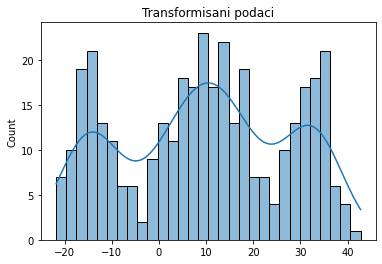

In [45]:
# Primena Yeo-Johnson transformacije
transformed_data, lambda_best_fit = stats.yeojohnson(average_data)

print(f"Optimalna vrednost lambda: {lambda_best_fit}")

# Prikaz rezultata
sns.histplot(transformed_data, kde=True, bins=30)
plt.title('Transformisani podaci')

plt.show()

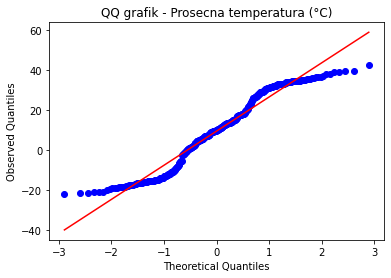

In [36]:
# Kreiranje QQ plota
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title('QQ grafik - Prosecna temperatura (°C)')
plt.ylabel('Observed Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

In [50]:
def test_normality(data):
    _, p_value = stats.shapiro(data)
    return p_value

# Pokušajte različite lambda vrednosti
lambdas = np.linspace(-2, 2, 100)
best_lambda = 0
best_p_value = 0

for l in lambdas:
    transformed_data = stats.yeojohnson(average_data, lmbda=l)
    p_value = test_normality(transformed_data)
    
    # Uzmite lambda koja ima p-vrednost najveću (bliže 1 znači normalnija distribucija)
    if p_value > best_p_value:
        best_p_value = p_value
        best_lambda = l

print(f"Najbolja lambda vrednost: {best_lambda}")

Najbolja lambda vrednost: 0.9898989898989901


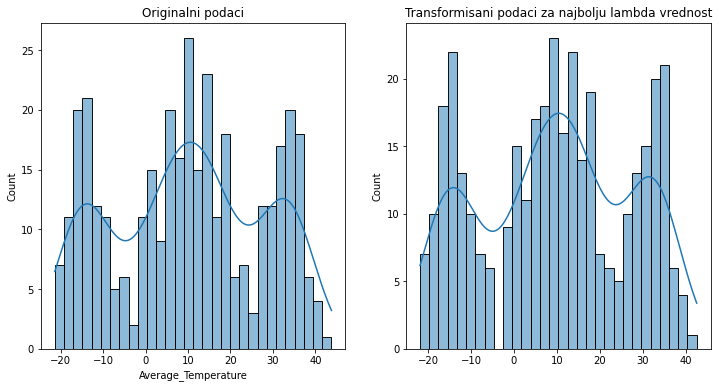

In [51]:
# Prikaz histograma za najbolju lambda vrednost
best_transformed_data = stats.yeojohnson(average_data, lmbda=best_lambda)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(average_data, kde=True, bins=30)
plt.title('Originalni podaci')

plt.subplot(1, 2, 2)
sns.histplot(best_transformed_data, kde=True, bins=30)
plt.title('Transformisani podaci za najbolju lambda vrednost')

plt.show()

In [99]:
# Generisanje podataka za standardnu Kosijevu raspodelu, gde je x0=0 i γ=1

np.random.seed(0)
cauchy_data = np.random.standard_cauchy(size=1000)

Optimalna vrednost lambda: 1.135653616610306


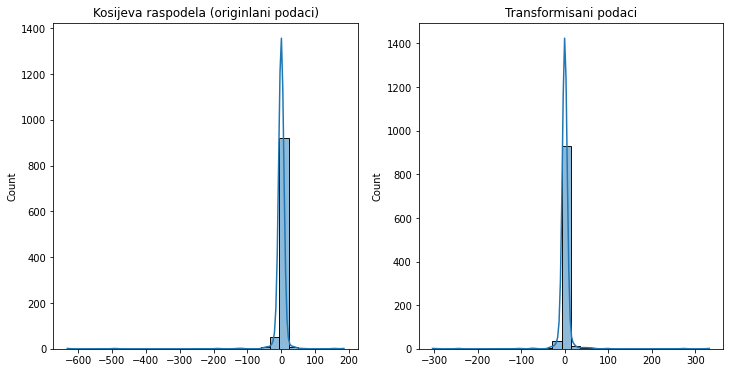

In [100]:
# Primena Yeo-Johnson transformacije
transformed_data, lambda_best_fit = stats.yeojohnson(cauchy_data)

print(f"Optimalna vrednost lambda: {lambda_best_fit}")

# Prikaz histograma
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(cauchy_data, kde=True, bins=30)
plt.title('Kosijeva raspodela (originlani podaci)')

plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, bins=30)
plt.title('Transformisani podaci')

plt.show()

---------------------------------------------------------------------------------------------------------------

Posmatramo raspodelu koja sadrzi samo pozitivne vrednosti da bismo videli kako se ove dve transofrmacije medjusibno porede. 

In [119]:
# formiramo putanju do fajla
current_dir = os.getcwd()

file_name = 'data/air_time.csv'
file_path = os.path.join(current_dir, file_name)

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

print('Total data points:{}'.format(len(data['AIR_TIME'])))
data.head()

File loaded successfully
Total data points:12657


,MONTH,AIR_TIME
0,1,28
1,1,29
2,1,29
3,1,29
4,1,29


In [120]:
total_column = data['AIR_TIME']

len(data[total_column == 0]), len(data[total_column < 0])

(0, 0)

Optimalna vrednost lambda (Yeo-Johnson): 0.27469319043002904
Optimalna vrednost lambda (Box-Cox): 0.2807713393426487


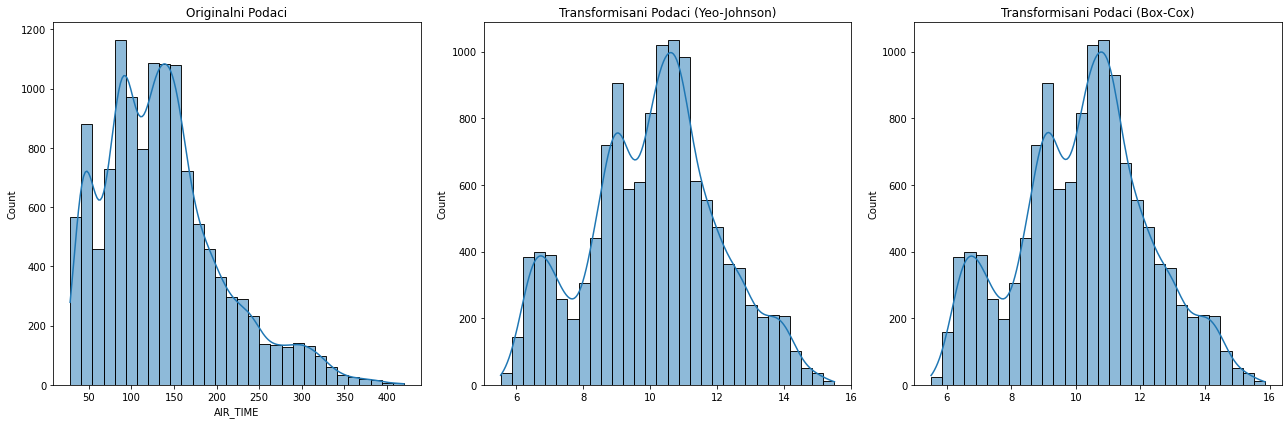

In [122]:
# Transformacije
transformed_data_box, lambda_best_fit_box = stats.boxcox(total_column)  # Box-Cox zahteva pozitivne podatke
transformed_data, lambda_best_fit = stats.yeojohnson(total_column)

print(f"Optimalna vrednost lambda (Yeo-Johnson): {lambda_best_fit}")
print(f"Optimalna vrednost lambda (Box-Cox): {lambda_best_fit_box}")

# Prikaz histograma
plt.figure(figsize=(18, 6))

# Originalni podaci
plt.subplot(1, 3, 1)
sns.histplot(total_column, kde=True, bins=30)
plt.title('Originalni Podaci')

# Transformisani podaci (Yeo-Johnson)
plt.subplot(1, 3, 2)
sns.histplot(transformed_data, kde=True, bins=30)
plt.title('Transformisani Podaci (Yeo-Johnson)')

# Transformisani podaci (Box-Cox)
plt.subplot(1, 3, 3)
sns.histplot(transformed_data_box, kde=True, bins=30)
plt.title('Transformisani Podaci (Box-Cox)')

plt.tight_layout()
plt.show()

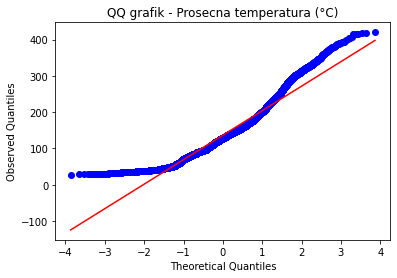

In [123]:
# Kreiranje QQ plota
stats.probplot(total_column, dist="norm", plot=plt)
plt.title('QQ grafik - Prosecna temperatura (°C)')
plt.ylabel('Observed Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

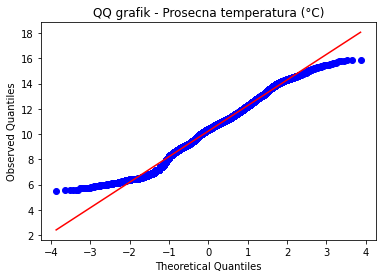

In [124]:
# Kreiranje QQ plota
stats.probplot(transformed_data_box, dist="norm", plot=plt)
plt.title('QQ grafik - Prosecna temperatura (°C)')
plt.ylabel('Observed Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()

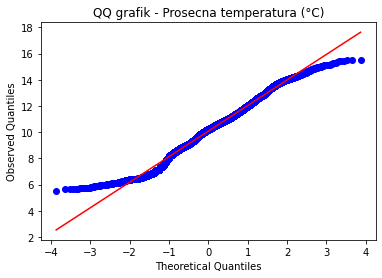

In [125]:
# Kreiranje QQ plota
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title('QQ grafik - Prosecna temperatura (°C)')
plt.ylabel('Observed Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.show()